<a href="https://colab.research.google.com/github/ArnavGhosh999/Crop-Recommender/blob/main/CropRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


<Axes: xlabel='label'>

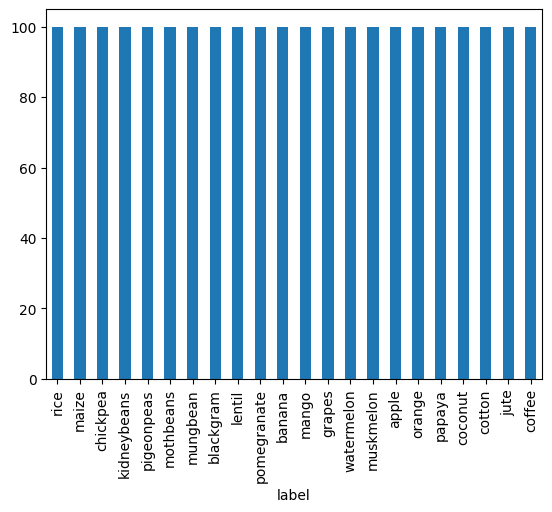

In [ ]:
df['label'].value_counts().plot.bar()

In [ ]:
print(df['label'].value_counts().index)

Index(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
       'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango',
       'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'],
      dtype='object', name='label')


In [ ]:
df['label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2200 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [ ]:
print("{:.2f}%".format(score*100))

99.55%


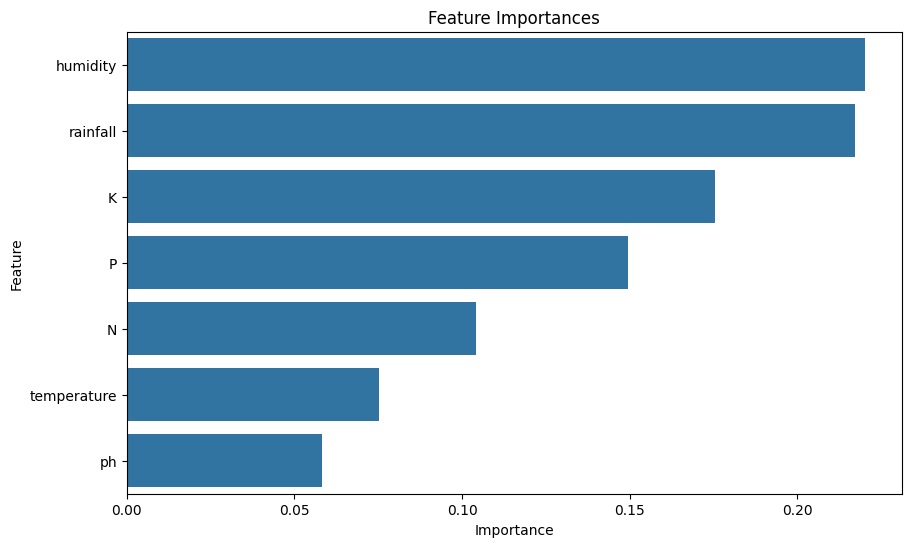

In [ ]:
feature_importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
!pip install FastAPI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install fastapi uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 742.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Find min and max values for each parameter
min_values = df[['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'humidity']].min()
max_values = df[['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'humidity']].max()

print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)


Minimum values:
N               0.000000
P               5.000000
K               5.000000
temperature     8.825675
ph              3.504752
rainfall       20.211267
humidity       14.258040
dtype: float64

Maximum values:
N              140.000000
P              145.000000
K              205.000000
temperature     43.675493
ph               9.935091
rainfall       298.560117
humidity        99.981876
dtype: float64


In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


In [ ]:
from ipywidgets import interact, FloatSlider

# Define the input sliders
N_slider = FloatSlider(min=0, max=140, step=1, description='N:')
P_slider = FloatSlider(min=0, max=145, step=1, description='P:')
K_slider = FloatSlider(min=0, max=205, step=1, description='K:')
temperature_slider = FloatSlider(min=0, max=43, step=0.1, description='Temperature:')
humidity_slider = FloatSlider(min=0, max=100, step=1, description='Humidity:')
rainfall_slider = FloatSlider(min=0, max=300, step=1, description='Rainfall:')
ph_slider = FloatSlider(min=0, max=9, step=0.1, description='pH:')

# Display the sliders
display(N_slider, P_slider, K_slider, temperature_slider, humidity_slider, rainfall_slider, ph_slider)

FloatSlider(value=0.0, description='N:', max=140.0, step=1.0)

FloatSlider(value=0.0, description='P:', max=145.0, step=1.0)

FloatSlider(value=0.0, description='K:', max=205.0, step=1.0)

FloatSlider(value=0.0, description='Temperature:', max=43.0)

FloatSlider(value=0.0, description='Humidity:', step=1.0)

FloatSlider(value=0.0, description='Rainfall:', max=300.0, step=1.0)

FloatSlider(value=0.0, description='pH:', max=9.0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df[['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'humidity']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
predicted_crop = classifier.predict([[N_slider.value, P_slider.value, K_slider.value, temperature_slider.value, ph_slider.value, rainfall_slider.value, humidity_slider.value]])
print("Predicted Crop:", predicted_crop[0])

Predicted Crop: kidneybeans


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install flask

  Using cached flask-3.0.3-py3-none-any.whl (101 kB)
  Using cached blinker-1.7.0-py3-none-any.whl (13 kB)
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
ERROR: Cannot uninstall 'blinker'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
